# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
An example of a data point with label 4


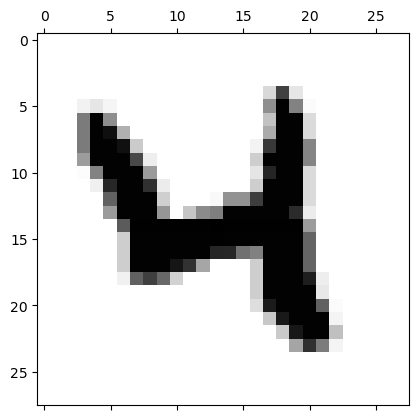

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [4]:
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import keras

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# Reshape data to include the channel dimension
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# Cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Rescale data in interval [0,1], normalizzo, toni di grigio diventano tra 0 e 1
X_train /= 255
X_test /= 255

# Look at an example of data point
print('An example of a data point with label', Y_train[20])
plt.matshow(X_train[20].reshape(28, 28), cmap='binary')
plt.show()

# Convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [5]:
# Define the CNN model
def create_CNN(input_shape, num_classes):
    model = Sequential()
    # First convolutional layer
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=(img_rows, img_cols, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    # Second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

# Training parameters
batch_size = 32
epochs = 50  # Inserire un numero adeguato di epoche

# Assumiamo che `input_shape`, `num_classes`, `X_train`, `Y_train`, `X_test` e `Y_test` siano già definiti
input_shape = (28, 28, 1)  # Esempio di input shape per immagini 28x28 in scala di grigi
num_classes = 10  # Numero di classi nel dataset

# Create the deep conv net
model_CNN = create_CNN(input_shape, num_classes)
model_CNN.summary()

/home/enrico/anaconda3/envs/tensorf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,302 (829.30 KB)

 Trainable params: 212,302 (829.30 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the CNN
history_CNN = model_CNN.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(X_test, Y_test))

# Evaluate the CNN
score_CNN = model_CNN.evaluate(X_test, Y_test, verbose=1)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5075 - loss: 1.4100 - val_accuracy: 0.9384 - val_loss: 0.2374
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8743 - loss: 0.4007 - val_accuracy: 0.9588 - val_loss: 0.1465
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9110 - loss: 0.2898 - val_accuracy: 0.9683 - val_loss: 0.1095
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9272 - loss: 0.2393 - val_accuracy: 0.9713 - val_loss: 0.0927
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9359 - loss: 0.2094 - val_accuracy: 0.9761 - val_loss: 0.0789
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9414 - loss: 0.1886 - val_accuracy: 0.9777 - val_loss: 0.0708
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9465 - loss: 0.1748 - val_accuracy: 0.9792 - val_loss: 0.0650
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9529 - loss: 0.1564 - 


CNN Test loss: 0.026134595274925232
CNN Test accuracy: 0.9915000200271606


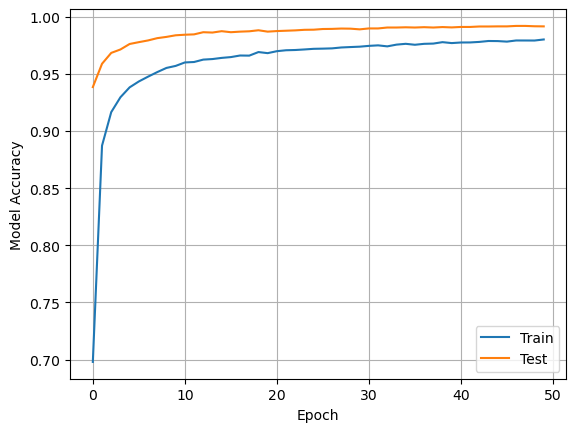

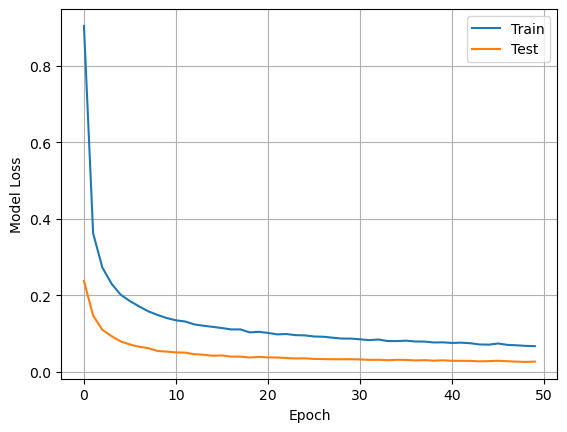

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


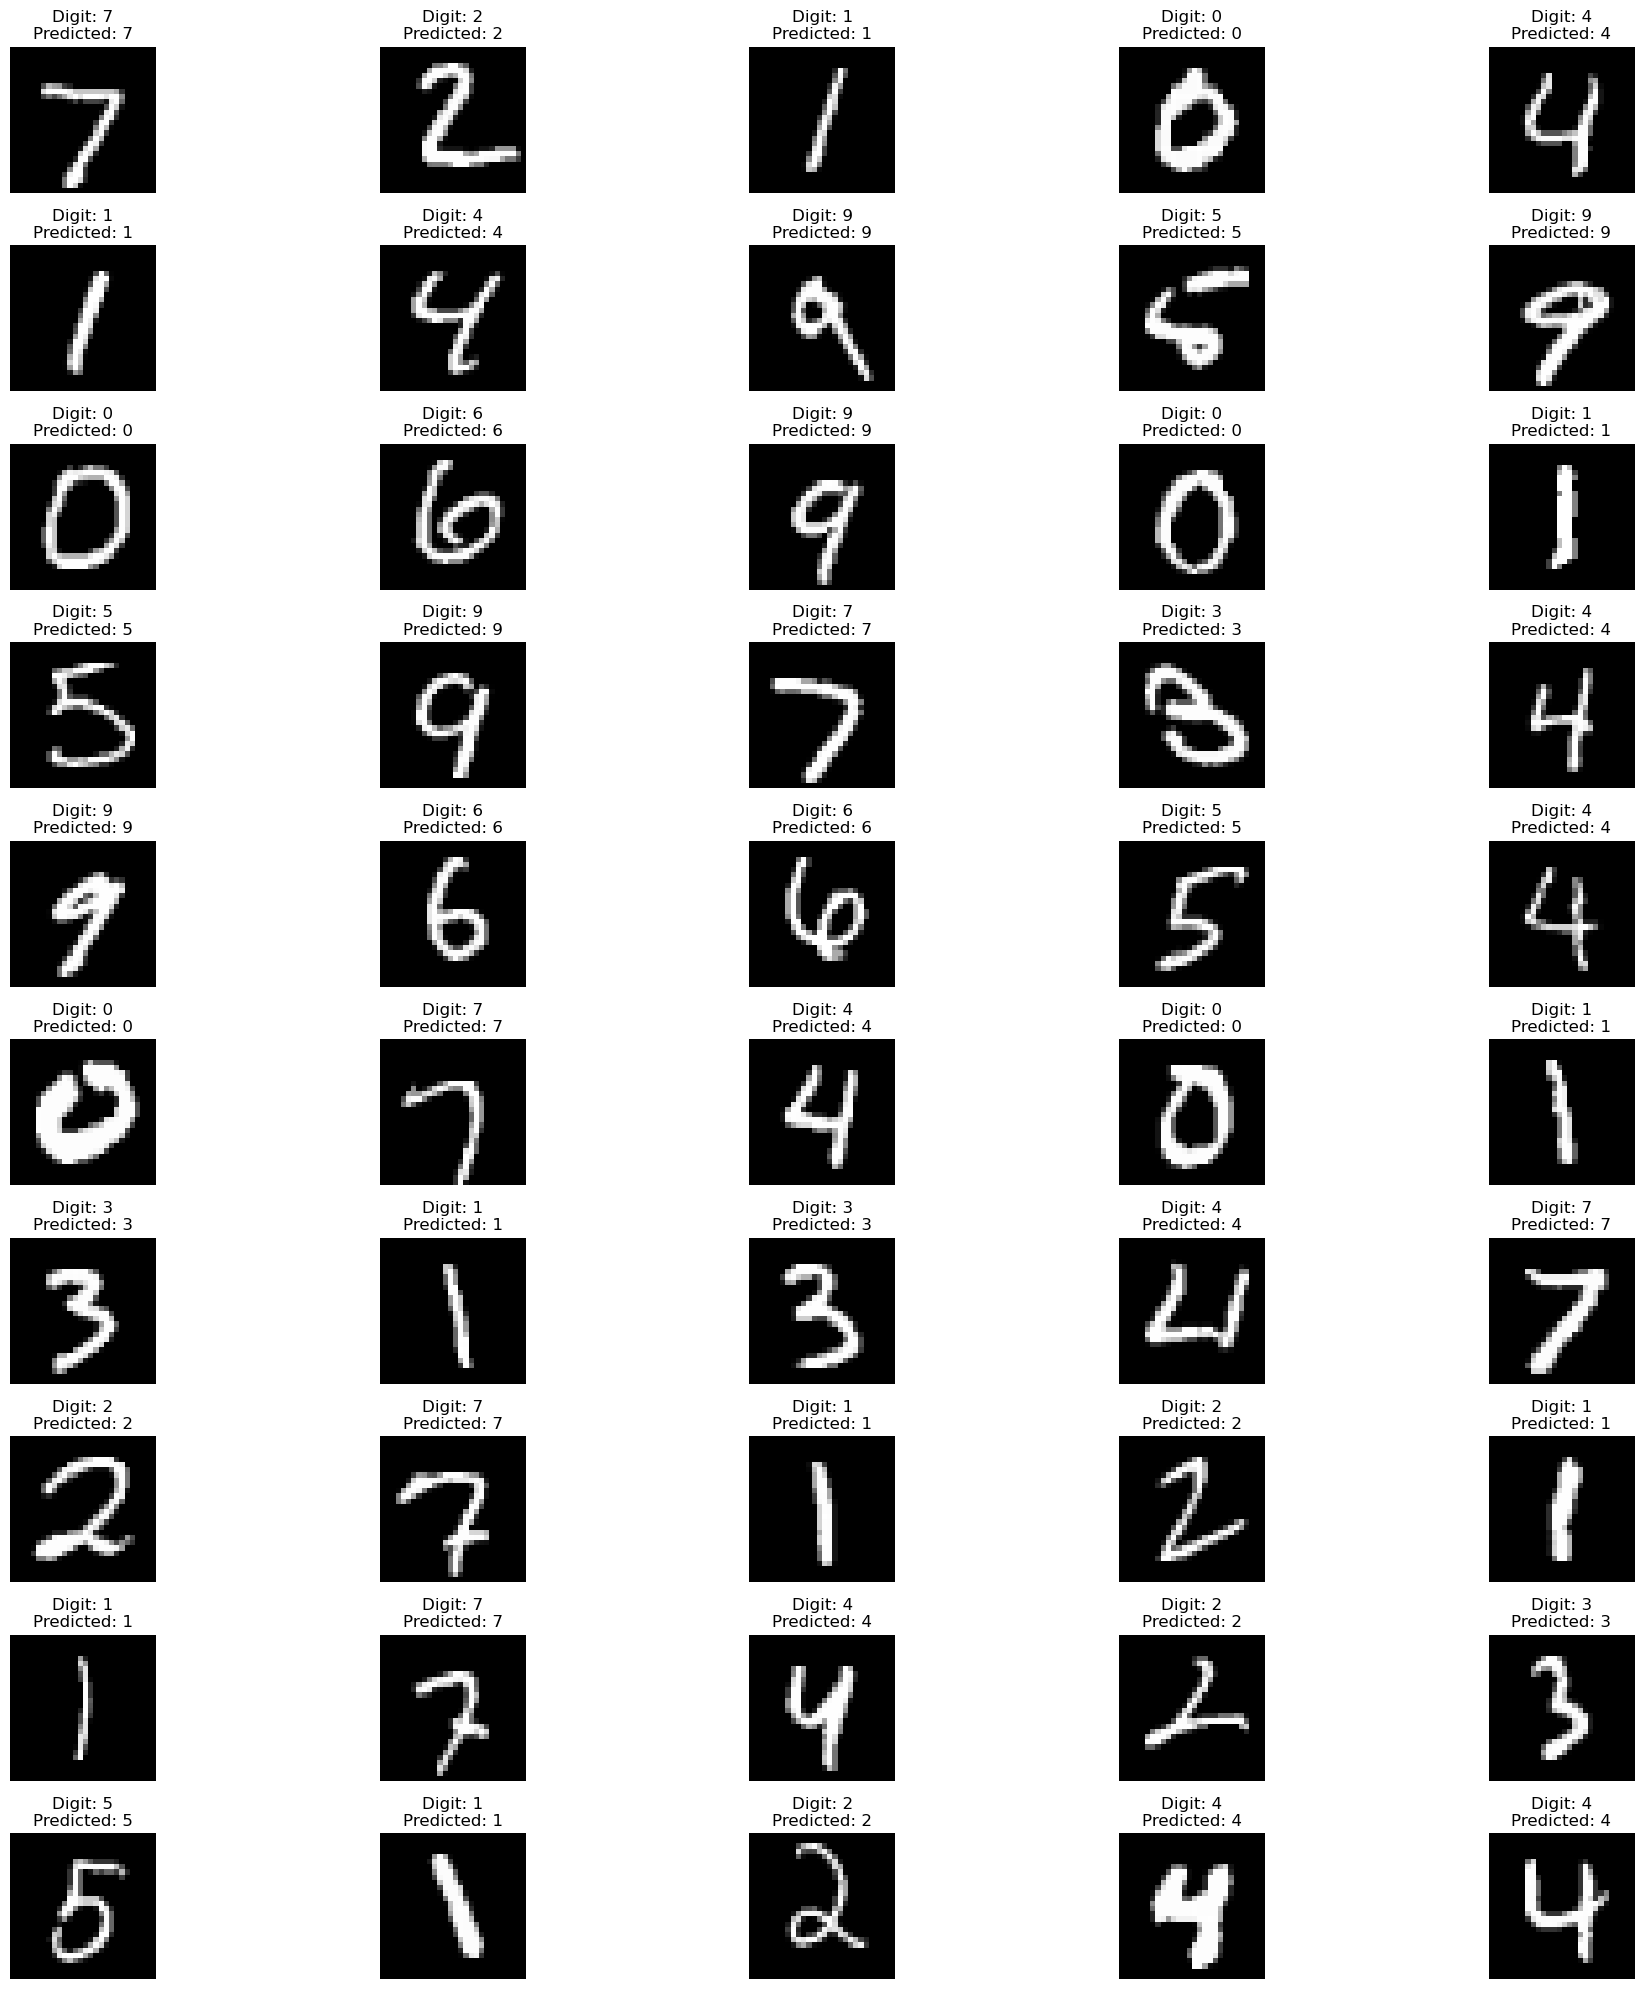

In [7]:
# Print CNN performance
print()
print('CNN Test loss:', score_CNN[0])
print('CNN Test accuracy:', score_CNN[1])

# Plot training history for accuracy
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.ylabel('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

# Plot training history for loss
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.ylabel('Model Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

# X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

# Number of images to plot
num_images = 50
# Determine the grid size for plotting
num_rows = 10
num_cols = 5

# Plot the specified number of test images along with their true and predicted labels
plt.figure(figsize=(20, 20))
for i in range(num_images):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.tight_layout()
plt.show()

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


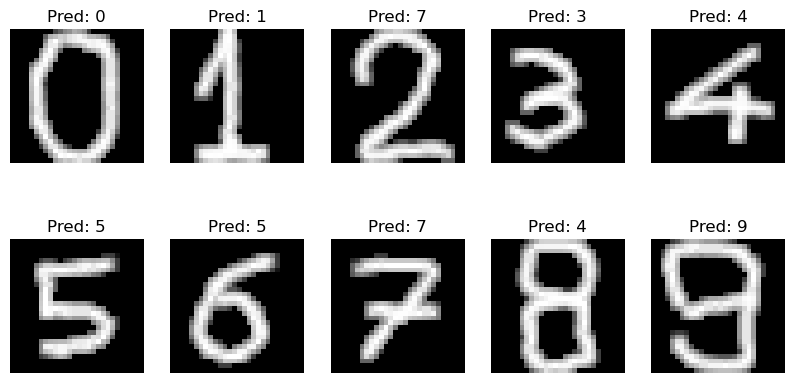

In [8]:
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

# Folder containing handwritten digit images
digit_folder = "./digits/"
digit_filenames = [os.path.join(digit_folder, f"{i}.png") for i in range(10)]
# Preprocess handwritten images
handwritten_digits = []

for digit_filename in digit_filenames:
    # Load image and convert to grayscale
    digit_in = Image.open(digit_filename).convert('L')
    
    # Resize to match MNIST input size (28x28)
    digit_in = digit_in.resize((28, 28))
    
    # Convert image to numpy array
    data = np.array(digit_in, dtype=np.float32)
    
    # Normalize pixel values to [0, 1]
    data /= 255
    
    # Append preprocessed image to the list
    handwritten_digits.append(data)

# Convert list to numpy array and reshape to match CNN input shape
handwritten_digits = np.array(handwritten_digits).reshape(len(handwritten_digits), 28, 28, 1)


# Predict handwritten digits using the trained CNN
predictions = model_CNN.predict(handwritten_digits)

# Display predictions
plt.figure(figsize=(10, 5))
for i, data in enumerate(handwritten_digits):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data.squeeze(), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    plt.title(f"Pred: {predicted_label}")
    plt.axis('off')
plt.show()